## Data Cleaning

In [41]:
import pandas as pd

all_sheets = pd.read_excel(
    '/project/data/compiled_results/Compiled Field Results  for DSI - 2023 Bulk 10 Trial Data.xlsx',
    sheet_name=None,
    skiprows=1
)

mass = all_sheets['All Mass Residuals by Prod TAB']
mass = mass.drop(mass.index[0]) 

new_names = {
    'Unnamed: 0': 'Facility Name',
    'Unnamed: 1': 'Trial Stage',
    'Unnamed: 2': 'Bag Set',
    "Unnamed: 3": 'Bag number'
}

mass = mass.rename(columns=new_names)
mass.to_csv("/project/data/compiled_results/mass_data.csv", index=False)

mass.head()


,Facility Name,Trial Stage,Bag Set,Bag number,Lined Hot Cup D,Hot Cup Lid A,Molded Fiber Bowl C,Spoon C,Coffee Pod,Spoon A,...,Fiber Clamshell,Butcher Paper,Navel orange peel,Cellulose bag,Lined Hot Cup D.1,Hot Cup Lid A.1,Bag B,Molded Fiber Bowl C.1,Cold Cup Lid B,Spoon C.1
1,Facility 1 ( Windrow),First Removal,A (blue),10,NaN,NaN,NaN,NaN,0.059,0.026,...,NaN,0.986,NaN,0.546,NaN,NaN,NaN,NaN,NaN,NaN
2,Facility 1 ( Windrow),First Removal,A (blue),6,NaN,NaN,NaN,NaN,0.022,0.175,...,NaN,0.696,0.007,0.572,NaN,NaN,NaN,NaN,NaN,NaN
3,Facility 1 ( Windrow),First Removal,A (blue),7,NaN,NaN,NaN,NaN,0.018,0.013,...,NaN,0.933,0.023,0.313,NaN,NaN,NaN,NaN,NaN,NaN
4,Facility 1 ( Windrow),First Removal,A (blue),8,NaN,NaN,NaN,NaN,0.22,0.424,...,NaN,0.909,0,0.412,NaN,NaN,NaN,NaN,NaN,NaN
5,Facility 1 ( Windrow),First Removal,A (blue),9,NaN,NaN,NaN,NaN,0.028,0.015,...,NaN,0.928,0.05,0.65,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
sa = all_sheets['All SA ImagJ Resids by Prod TAB']
sa = sa.rename(columns=new_names)
sa = sa.iloc[1:,]
sa.to_csv("/project/data/compiled_results/SA_data.csv", index=False)
sa.head()

,Facility Name,Trial Stage,Bag Set,Bag number,Lined Hot Cup D,Hot Cup Lid A,Molded Fiber Bowl C,Spoon C,Coffee Pod,Spoon A,...,Fiber Clamshell,Butcher Paper,Navel orange peel,Cellulose bag,Lined Hot Cup D.1,Hot Cup Lid A.1,Bag B,Molded Fiber Bowl C.1,Cold Cup Lid B,Spoon C.1
1,Facility 1 ( Windrow),First Removal,A (blue),10,NaN,NaN,NaN,NaN,0.244,0.039,...,NaN,0.618,0.233,0.225,NaN,NaN,NaN,NaN,NaN,NaN
2,Facility 1 ( Windrow),First Removal,A (blue),6,NaN,NaN,NaN,NaN,0.075,0.237,...,NaN,0.579,0.023,0.197,NaN,NaN,NaN,NaN,NaN,NaN
3,Facility 1 ( Windrow),First Removal,A (blue),7,NaN,NaN,NaN,NaN,0.08,0.015,...,NaN,0.828,0.061,0.195,NaN,NaN,NaN,NaN,NaN,NaN
4,Facility 1 ( Windrow),First Removal,A (blue),8,NaN,NaN,NaN,NaN,0.195,0.62,...,NaN,0.605,0,0.272,NaN,NaN,NaN,NaN,NaN,NaN
5,Facility 1 ( Windrow),First Removal,A (blue),9,NaN,NaN,NaN,NaN,0.117,0.02,...,NaN,0.786,0.146,0.271,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
import re

mass = pd.read_csv('/project/data/compiled_results/mass_data.csv')

def clean_facility_name(name):
    clean_name = re.sub(r'.*\(', '', name)
    clean_name = re.sub(r'\)', '', clean_name).strip()
    return clean_name

mass['Facility Name'] = mass['Facility Name'].apply(clean_facility_name)
mass.head()

mass['Facility Name'].unique()


array(['Windrow', 'CASP', 'EASP', 'ASP', 'In-Vessel'], dtype=object)

## Facility analysis

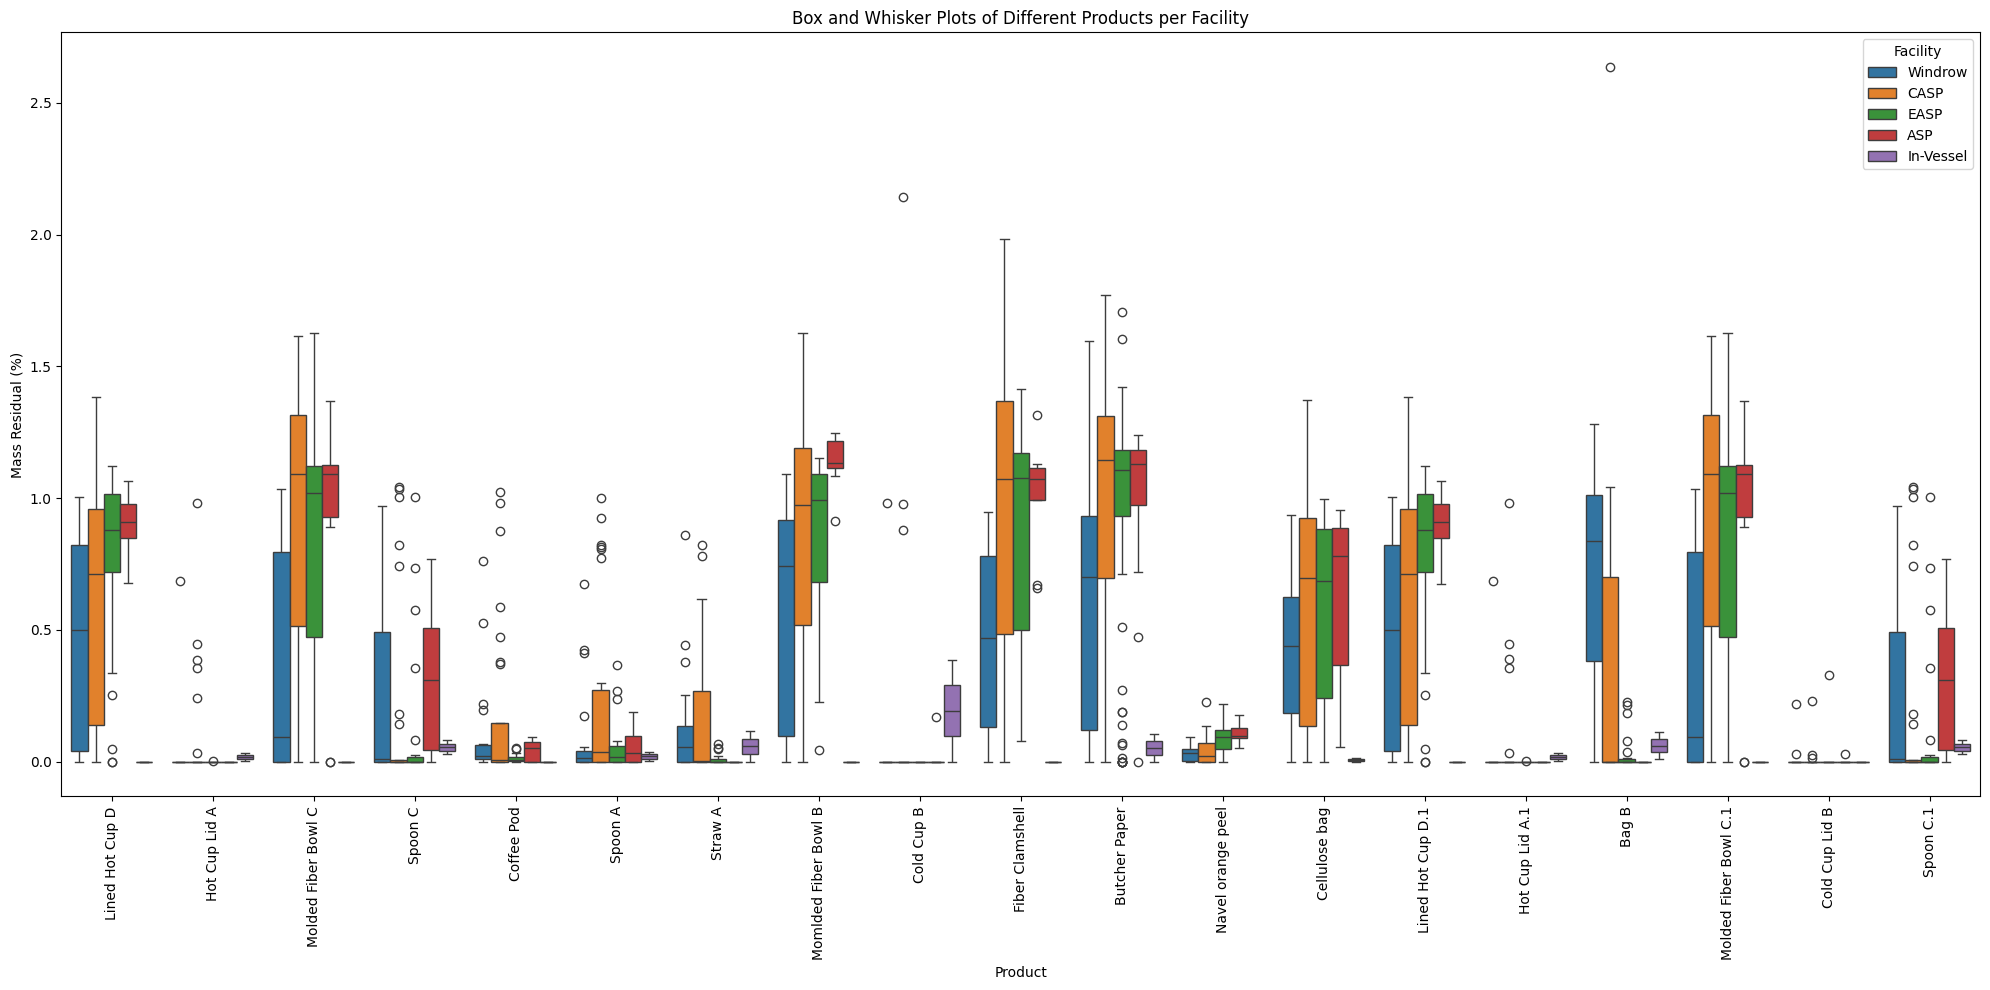

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = mass.select_dtypes(include='number').columns.tolist()
mass_numeric = mass[['Facility Name'] + numeric_columns]

mass_numeric_melted = mass_numeric.melt(id_vars='Facility Name', var_name='Product', value_name='Measurement')

plt.figure(figsize=(20, 10))
sns.boxplot(x='Product', y='Measurement', hue='Facility Name', data=mass_numeric_melted)
plt.title('Box and Whisker Plots of Different Products per Facility')
plt.xticks(rotation=90) 
plt.xlabel('Product')
plt.ylabel('Mass Residual (%)')
plt.legend(title='Facility')
plt.tight_layout()
plt.show()

## Phase Analysis

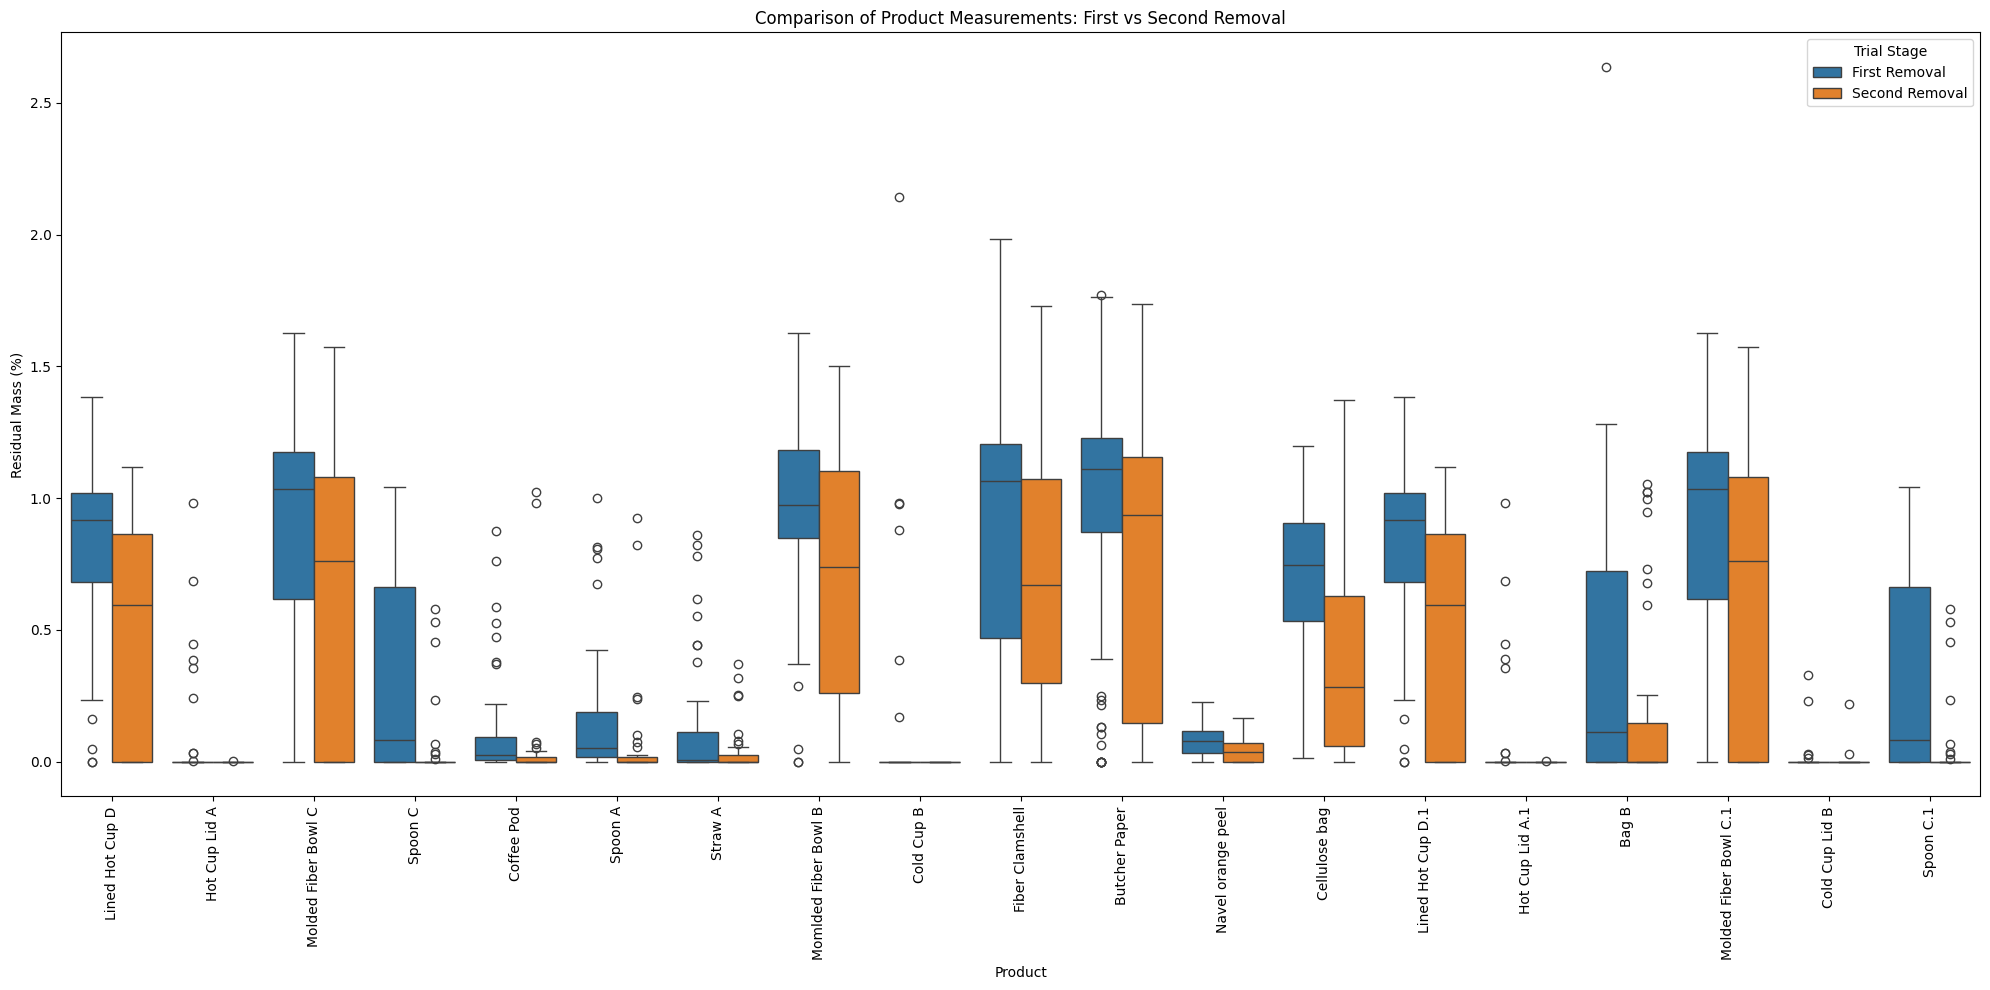

In [49]:
trial_stages_filtered = mass[mass['Trial Stage'].isin(['First Removal', 'Second Removal'])]
numeric_columns = mass.select_dtypes(include='number').columns.tolist()

trial_stages_melted = trial_stages_filtered.melt(id_vars=['Trial Stage'], value_vars=numeric_columns,
                                                  var_name='Product', value_name='Measurement')

trial_stages_melted['Measurement'] = pd.to_numeric(trial_stages_melted['Measurement'], errors='coerce')
trial_stages_melted_cleaned = trial_stages_melted.dropna(subset=['Measurement'])

plt.figure(figsize=(20, 10))
sns.boxplot(x='Product', y='Measurement', hue='Trial Stage', data=trial_stages_melted_cleaned)
plt.title('Comparison of Product Measurements: First vs Second Removal')
plt.xticks(rotation=90) 
plt.xlabel('Product')
plt.ylabel('Residual Mass (%)')
plt.legend(title='Trial Stage')
plt.tight_layout()
plt.show()



## Product Analysis

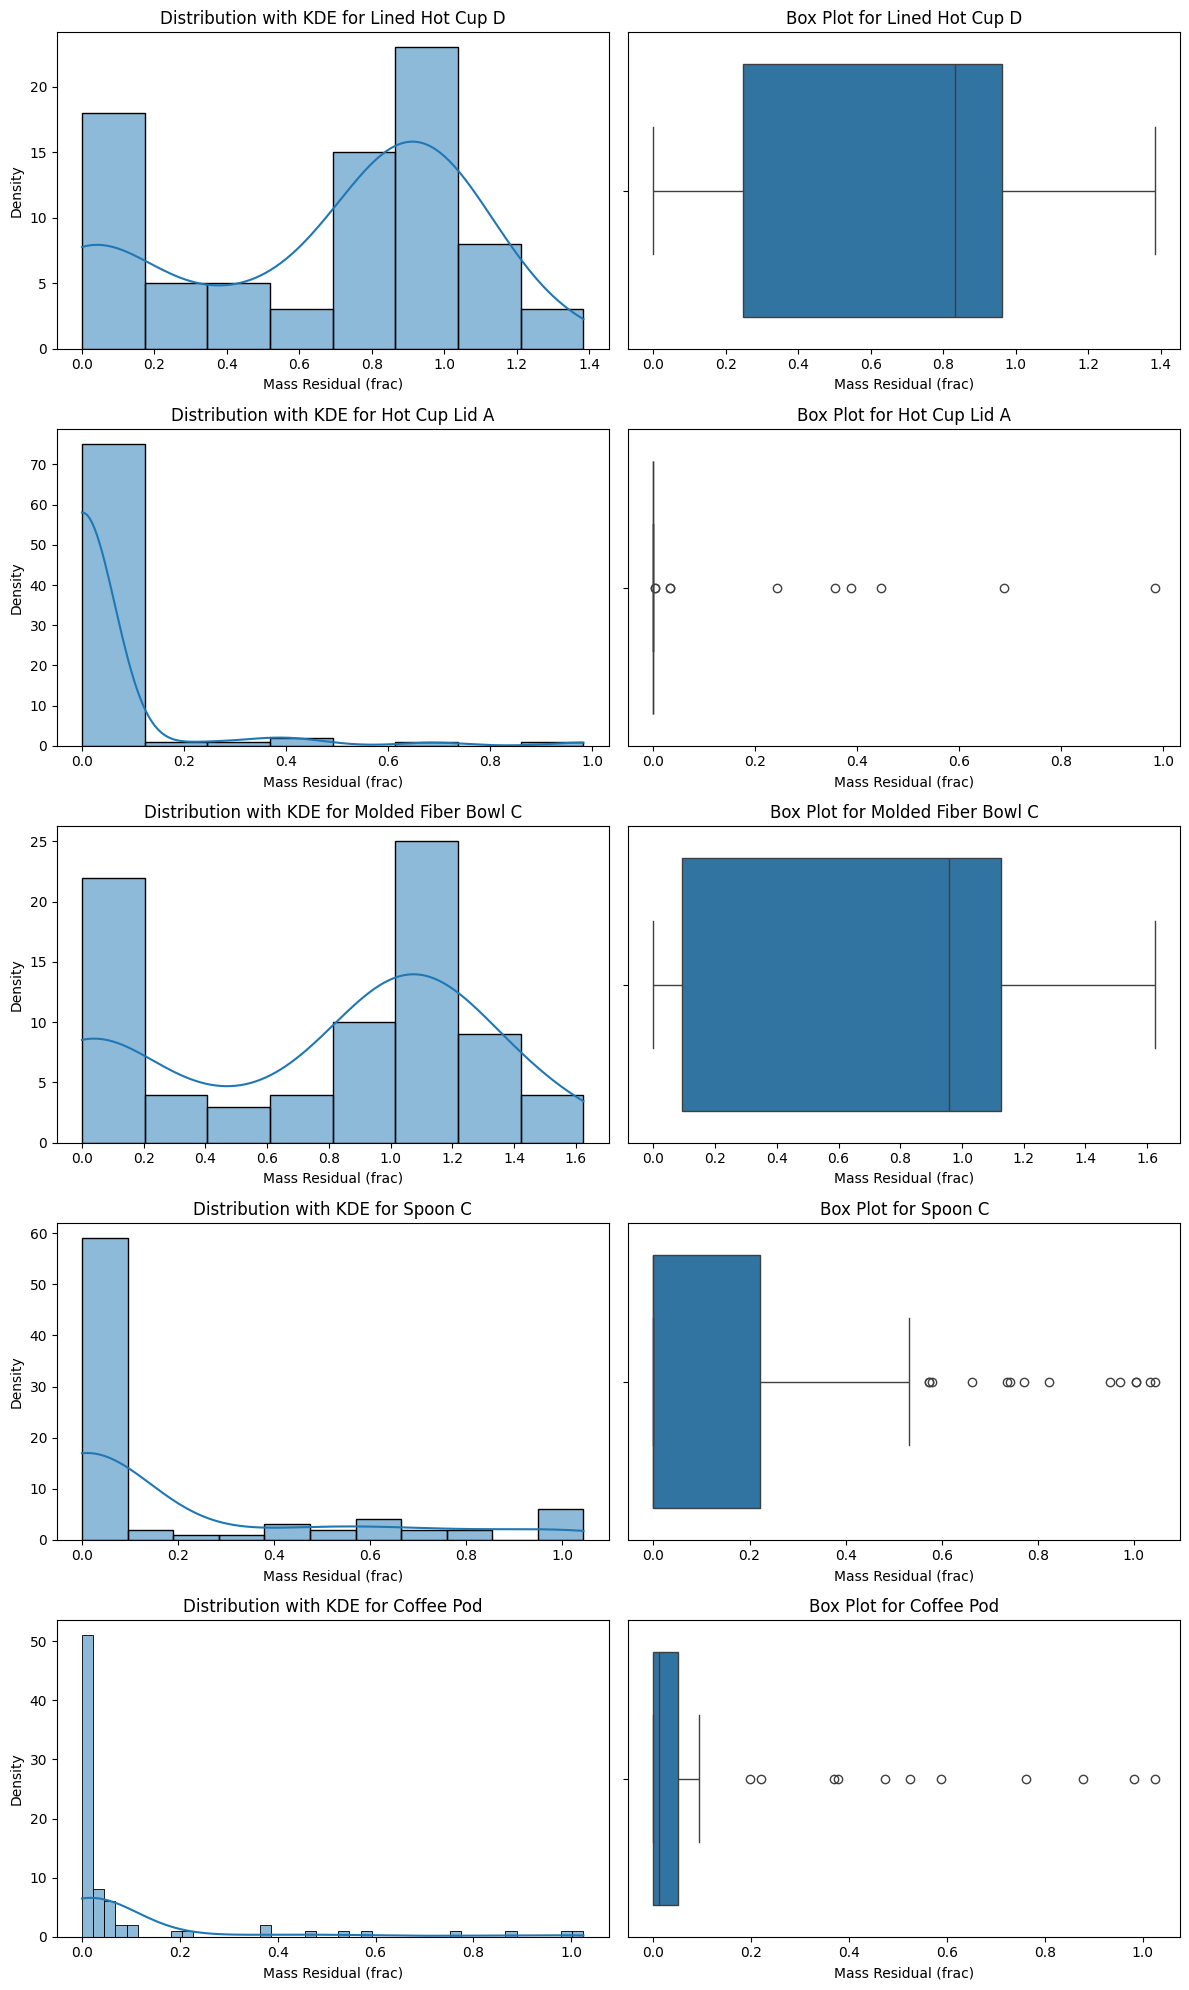

In [51]:
selected_products = ['Lined Hot Cup D', 'Hot Cup Lid A', 'Molded Fiber Bowl C', 'Spoon C', 'Coffee Pod']

fig, axes = plt.subplots(nrows=len(selected_products), ncols=2, figsize=(12, 4 * len(selected_products)))

if len(selected_products) == 1:
    axes = np.array([[axes,]])

for row, product in enumerate(selected_products):
    sns.histplot(mass[product], ax=axes[row, 0], kde=True)
    axes[row, 0].set_title(f'Distribution with KDE for {product}')
    axes[row, 0].set_xlabel('Mass Residual (frac)')
    axes[row, 0].set_ylabel('Density')
    
    sns.boxplot(x=mass[product], ax=axes[row, 1])
    axes[row, 1].set_title(f'Box Plot for {product}')
    axes[row, 1].set_xlabel('Mass Residual (frac)')
    axes[row, 1].set_ylabel('')

plt.tight_layout()
plt.show()